<a href="https://colab.research.google.com/github/AxelMoroz/AxelMoroz/blob/main/primer_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/clientes.csv')


In [ ]:
print(df.shape)           # dimensiones
print(df.dtypes)          # tipos de datos
print(df.isna().mean())   # % nulos por columna

(100, 6)
CustomerID     int64
Age            int64
Income         int64
Segment       object
City          object
Churn          int64
dtype: object
CustomerID    0.0
Age           0.0
Income        0.0
Segment       0.0
City          0.0
Churn         0.0
dtype: float64


In [ ]:
# -----------------------------------------------------------
# Pipeline completo de clasificación de churn (Random Forest)
# Datos de ejemplo: clientes.csv generado previamente
# -----------------------------------------------------------

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

# 1. Cargar datos ------------------------------------------------------------
df = pd.read_csv('clientes.csv')            # asegúrate de que el .csv esté en el mismo directorio
print(df.head())                            # inspección rápida
print(df.columns.tolist())                  # ['CustomerID', 'Age', 'Income', 'Segment', 'City', 'Churn']

# 2. Definir columnas numéricas y categóricas --------------------------------
num_cols = ['Age', 'Income']
cat_cols = ['Segment', 'City']

# 3. Pre‑procesamiento: imputación + escalado (num) y OHE (cat) --------------
pre = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc',  StandardScaler())
        ]), num_cols),

        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ]
)

# 4. División train‑test -----------------------------------------------------
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 5. Modelo + pipeline completo ---------------------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

model = Pipeline(steps=[
    ('prep', pre),
    ('clf',  rf_clf)
])

# 6. Validación cruzada (ROC‑AUC) -------------------------------------------
scores = cross_val_score(
    model, X_train, y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
print(f"ROC‑AUC promedio CV: {scores.mean():.3f}")

# 7. Entrenamiento final y evaluación ---------------------------------------
model.fit(X_train, y_train)

y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nReporte de clasificación (test):")
print(classification_report(y_test, y_pred))

print(f"ROC‑AUC test: {roc_auc_score(y_test, y_proba):.3f}")


   CustomerID  Age  Income Segment          City  Churn
0           1   56  129752  Bronze       Córdoba      0
1           2   69   63984  Bronze       Córdoba      0
2           3   46   55774    Gold       Córdoba      0
3           4   32   17568  Silver  Buenos Aires      0
4           5   60  135151  Silver       Mendoza      1
['CustomerID', 'Age', 'Income', 'Segment', 'City', 'Churn']
ROC‑AUC promedio CV: 0.571

Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.00      0.00      0.00         4

    accuracy                           0.70        20
   macro avg       0.39      0.44      0.41        20
weighted avg       0.62      0.70      0.66        20

ROC‑AUC test: 0.531


In [ ]:
#Carga el archivo clientes.csv.

#Identifica columnas numéricas (Age, Income) y categóricas (Segment, City).

#Crea un ColumnTransformer que:

#Imputa medianas y escala numéricos.

#Imputa modo y aplica One‑Hot Encoding a categóricos.

#Divide los datos en entrenamiento (80 %) y prueba (20 %), estratificando para conservar la proporción de churn.

#Construye un Pipeline con el preprocesamiento y un RandomForestClassifier.

#Evalúa con validación cruzada (5‑fold, métrica ROC‑AUC).

#Entrena en el train completo y reporta precisión, recall, F1 y ROC‑AUC sobre el test.

In [ ]:
# Ejecuta esta celda una sola vez. Instala librerías que Colab no trae por defecto.
%pip install --quiet seaborn plotly

In [ ]:
%matplotlib inline
# Opcional: tamaño por defecto más cómodo
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)


In [ ]:
import pandas as pd

# Ejemplo: leer desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/clientes.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Age,Income,Segment,City,Churn
0,1,56,129752,Bronze,Córdoba,0
1,2,69,63984,Bronze,Córdoba,0
2,3,46,55774,Gold,Córdoba,0
3,4,32,17568,Silver,Buenos Aires,0
4,5,60,135151,Silver,Mendoza,1


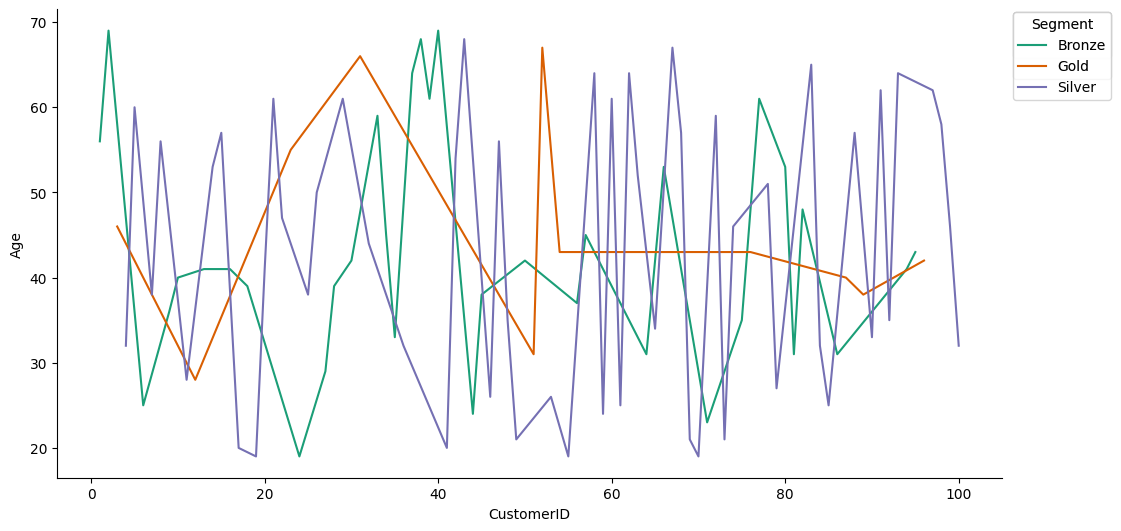

In [ ]:
# @title CustomerID vs Age

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Segment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Segment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

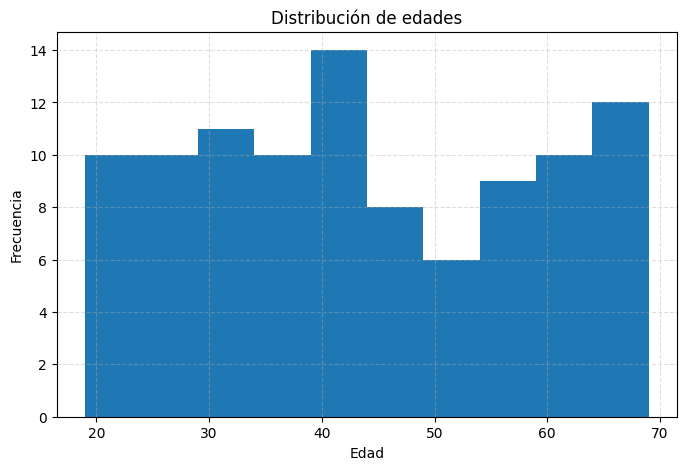

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins=10)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


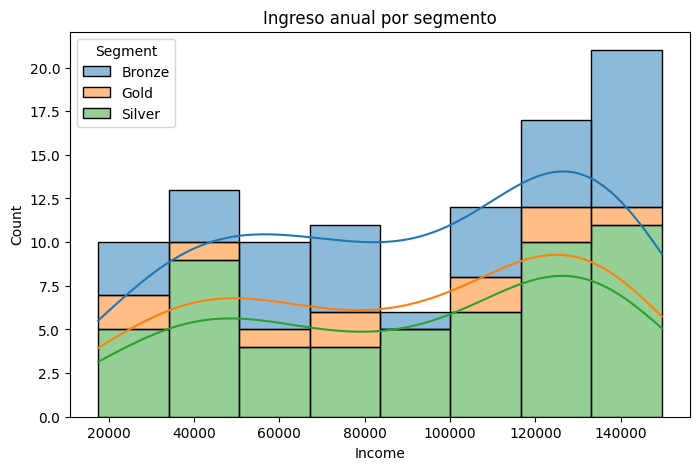

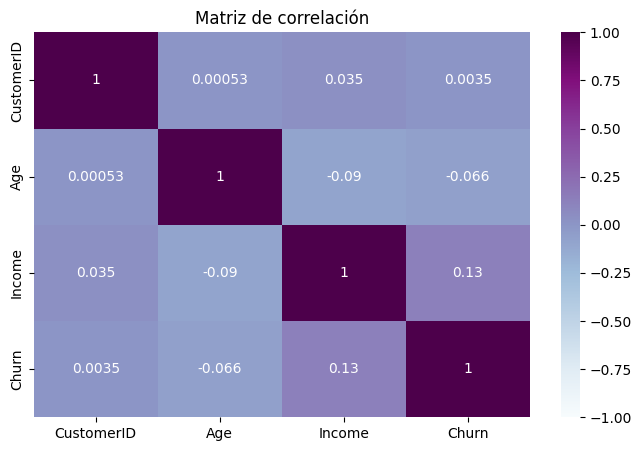

In [ ]:
import seaborn as sns

# Histograma con kernel density
sns.histplot(data=df, x="Income", kde=True, hue="Segment", multiple="stack")
plt.title("Ingreso anual por segmento")
plt.show()

# Heatmap de correlación
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="BuPu", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    df, x="Income", y="Age",
    color="Segment", size="Churn",
    hover_data=["City", "CustomerID"],
    title="Ingreso vs Edad (interactivo)"
)
fig.show()


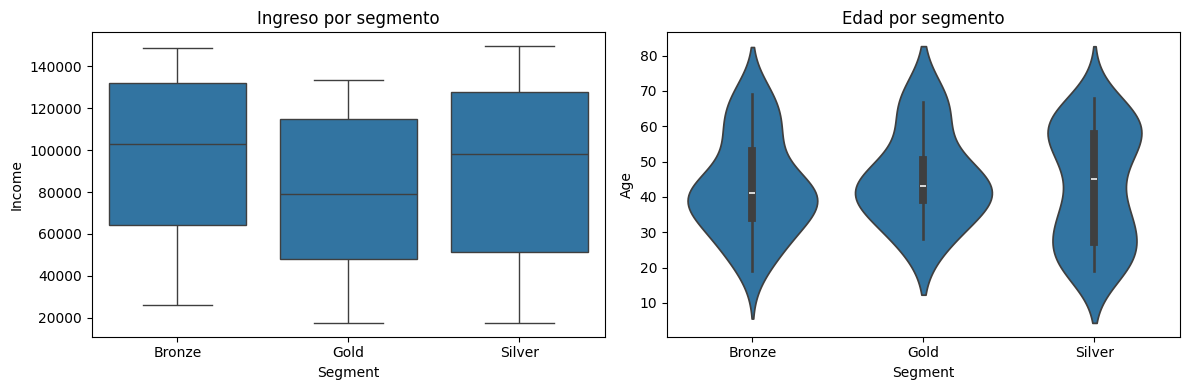

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=df, x="Segment", y="Income", ax=axs[0])
axs[0].set_title("Ingreso por segmento")

sns.violinplot(data=df, x="Segment", y="Age", ax=axs[1])
axs[1].set_title("Edad por segmento")

plt.tight_layout()
plt.show()
